In [1]:
!pip install wordcloud
!pip install emoji
import nltk
nltk.download('all')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.2 MB/s eta 0:00:00


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [2]:
#this library for data analysis and modification
import pandas as pd
#Using a library for mathematical operations and handling multi-dimensional arrays.
import numpy as np
# Adding a visualization creation library, particularly for static plots and graphs.
import matplotlib.pyplot as plt
# Bringing in a library to make more complex and visually appealing plots and visualztions.
import seaborn as sns
# Adding interactive visuals by this librry
import plotly.graph_objects as go
import plotly.express as px
# This library is  managing textual regular expressions
import re
# string module for manipulating strings, such as removing punctuation
import string
# For tasks involving natural language processing
import nltk
# Emoji for identifying and managing textual emojis
import emoji
# Imprting a tool to eliminate unnecessary or overly frequent words in text analysis.
from nltk.corpus import stopwords
# Importing a tool for reducing word to the basic form converting "running" to "run".
from nltk.stem import WordNetLemmatizer
# Importing a tool to generate visual representations of word base on frequency in a dataset.
from wordcloud import WordCloud
# Importing a method to convert txtual data into numercal format based word frequncy.
from sklearn.feature_extraction.text import TfidfVectorizer
# To balance data, a method to adding more exampl to the smaller class is imported.
from imblearn.over_sampling import SMOTE
# Importing a tool divide a dataset into separate sets for training and testing machine learning modle.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score, f1_score, roc_auc_score,roc_curve, auc
# Turning off pointless warnings to improve the output's readability and cleanliness.
import warnings
# imprt necceraary for werring
warnings.filterwarnings("ignore")

In [3]:
fake_data=pd.read_csv("/content/drive/MyDrive/Ml Projects/Fake.csv")
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
real_data=pd.read_csv("/content/drive/MyDrive/Ml Projects/True.csv")
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_data['label']=0
real_data['label']=1

In [6]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [7]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [8]:
fake_data.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [9]:
real_data.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [10]:
fake_data.duplicated().sum()

np.int64(3)

In [11]:
fake_data.drop_duplicates(inplace=True)

In [12]:
real_data.duplicated().sum()

np.int64(206)

In [13]:
real_data.drop_duplicates(inplace=True)

In [14]:
fake_data.shape

(23478, 5)

In [15]:
real_data.shape

(21211, 5)

In [16]:
final_data=pd.concat([fake_data,real_data])
final_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
final_data=final_data.drop(['title','subject','date'], axis= 1)
final_data.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [18]:
def clean_text(txt):
    # Convert to lowercase
    txt = str(txt).lower()

    # Remove URLs and HTML tags
    txt = re.sub(r'https?://\S+|www\.\S+', '', txt)
    txt = re.sub(r'<.*?>', '', txt)

    # Remove mentions (@user) and hashtags symbol (keep the word itself)
    txt = re.sub(r'@\w+', '', txt)
    txt = re.sub(r'#', '', txt)

    # Convert emojis to text (🙂 -> ":slightly_smiling_face:")
    txt = emoji.demojize(txt, language="en")

    # Keep only alphabets, numbers, and spaces (punctuation removed)
    txt = re.sub(r'[^a-z0-9\s]', '', txt)

    # Normalize multiple spaces
    txt = re.sub(r'\s+', ' ', txt).strip()

    # Tokenization
    tokens = nltk.word_tokenize(txt)

    # Keep negations ("not", "no", "never") but remove other stopwords
    stop_words = set(stopwords.words('english')) - {"not", "no", "nor", "never"}
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

# Apply preprocessing
final_data['cleaned_text'] = final_data['text'].apply(clean_text)


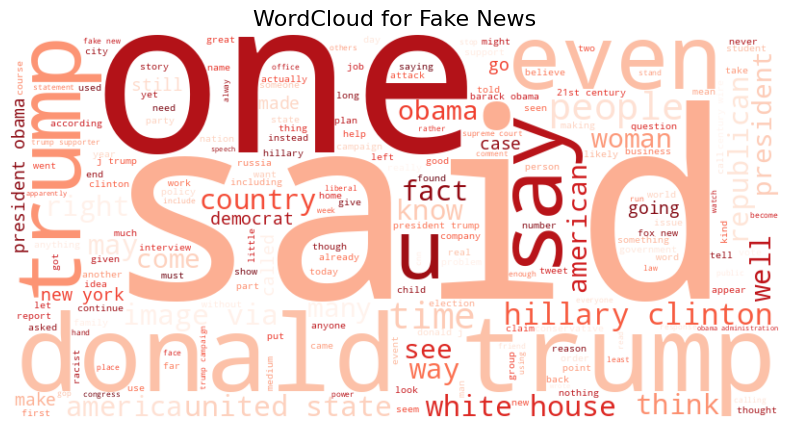

In [19]:
# WordCloud for Fake News (label = 0)
fake_words = ' '.join(final_data[final_data['label'] == 0]['cleaned_text'])

wordcloud_fake = WordCloud(width=800, height=400,
                           background_color='white',
                           colormap='Reds').generate(fake_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Fake News", fontsize=16)
plt.show()

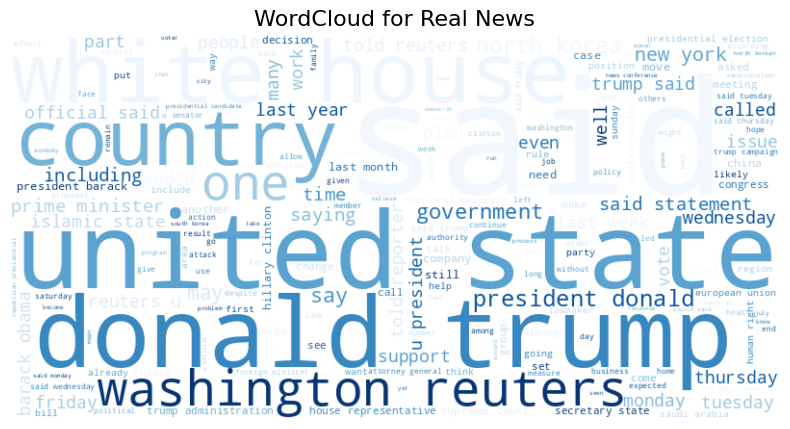

In [20]:
real_words = ' '.join(final_data[final_data['label'] == 1]['cleaned_text'])

wordcloud_real = WordCloud(width=800, height=400,
                           background_color='white',
                           colormap='Blues').generate(real_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Real News", fontsize=16)
plt.show()

In [21]:
# Creating a tool that turns a collection of text documents into numerical values based on how important each word is in relation to other documents.
tfidf_vectorizer = TfidfVectorizer()
# Fitts and also transformation thes cleand txt datas
tfidf_matrix = tfidf_vectorizer.fit_transform(final_data['cleaned_text'])

In [22]:
label_counts = final_data['label'].value_counts()
fig = px.bar(
    x=label_counts.index,
    y=label_counts.values,
    labels={'x': 'label', 'y': 'Count'},  # Axis labels
    title='label Distribution',  # Chart title
    color=label_counts.index,
    color_discrete_sequence=['#636EFA', '#EF553B'],  # Custom colors
)

# Customize layout for better appearance
fig.update_layout(
    xaxis_title='label',
    yaxis_title='Count',
    font=dict(family='Arial', size=14),  # Font settings
    plot_bgcolor='white',  # Background color
    xaxis=dict(showgrid=False),  # Remove x-axis grid lines
    yaxis=dict(showgrid=True, gridcolor='lightgray'),  # Customize y-axis grid lines
)
# Display the interactive chart
fig.show()

In [23]:
X = tfidf_matrix
y = final_data['label']
smot = SMOTE(random_state=42)
Xresamp, yresamp = smot.fit_resample(X, y)

In [24]:
label_counts = pd.DataFrame({'label': yresamp})['label'].value_counts()

fig = px.bar(
    x=label_counts.index,
    y=label_counts.values,
    labels={'x': 'label', 'y': 'Count'},
    title='label Distribution After SMOTE',
    color=label_counts.index,  # Color bars based on category
    color_discrete_sequence=['#636EFA', '#EF553B']  # customize colors
)

fig.update_layout(
    xaxis_title='label',
    yaxis_title='Count',
    font=dict(family='Arial', size=14),
    plot_bgcolor='white',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
)

fig.show()

In [25]:
X_train,X_test,y_train,y_test = train_test_split(Xresamp, yresamp, test_size=0.2, random_state=42)

In [26]:
# Initialize and train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

Accuracy: 0.9456660632520498
Precision: 0.9423443456162643
Recall: 0.9492293744333635
F1 Score: 0.9457743298174766


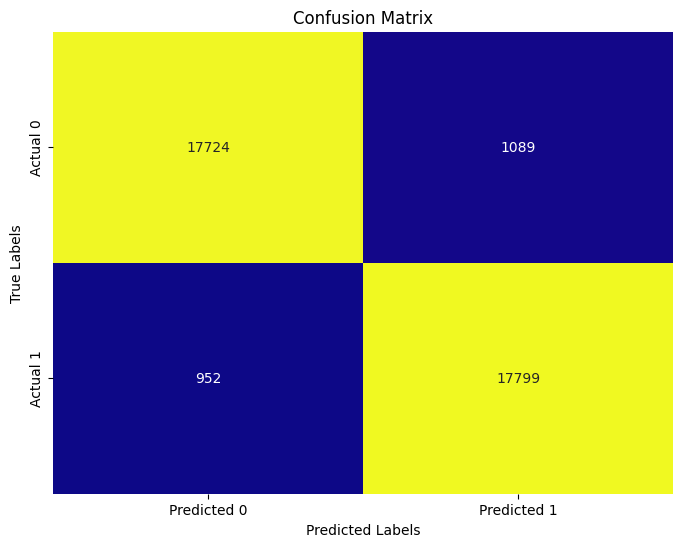

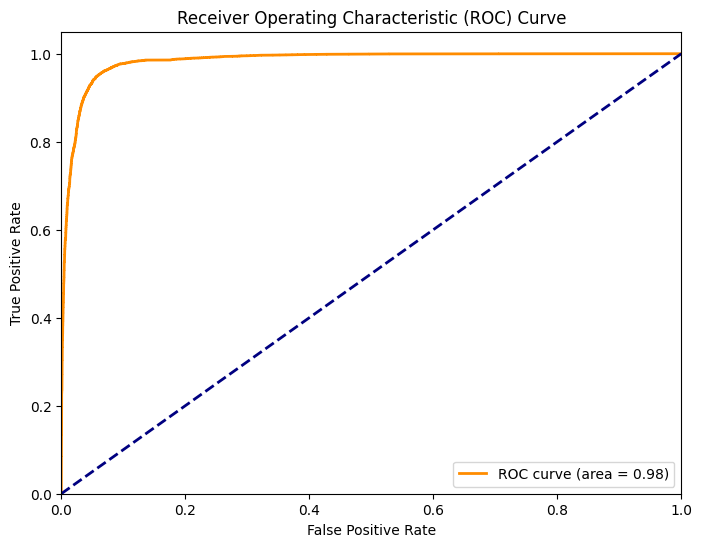

In [ ]:
# Producing output estimates for the provided input examples using most effective tree-based model.
ypredranclstrain = rf_classifier.predict(X_train)
accranclstrain=accuracy_score(y_train,ypredranclstrain)
precranclstrain=precision_score(y_train,ypredranclstrain)
recallranclstrain=recall_score(y_train,ypredranclstrain)
f1ranclstrain=f1_score(y_train,ypredranclstrain)
cmranclstrain=confusion_matrix(y_train,ypredranclstrain)

# Displaying how often the predictions weres correct in total.
print("Accuracy:",accranclstrain)
# Showing the proportion of flagged positves that were actually tru.
print("Precision:",precranclstrain)
# Indicating the portion of true positives successfully identified.
print("Recall:",recallranclstrain)
# Presenting the combined measure of precision and recall, weighted evenly.
print("F1 Score:",f1ranclstrain)

# setup fegure sizs of graphh
plt.figure(figsize=(8, 6))
#create conffusion matric using heattmp
sns.heatmap(cmranclstrain, annot=True, fmt="d", cmap="plasma", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            # The vertical axis is labelled to reflect the actuals class values.
            yticklabels=['Actual 0', 'Actual 1'])
#setup tittle fof graphh
plt.title('Confusion Matrix')
#adding labeling on xaxi
plt.xlabel('Predicted Labels')
#adding labelling on yaxs
plt.ylabel('True Labels')
# Display the final visual output.
plt.show()
#Extract the anticipated probbilities for the positve clas .
yprobaranclstrain = rf_classifier.predict_proba(X_train)[:, 1]

# Producing values required to plot curv asesing  false alarm rate versus sensittivity trade-off.
fpr, tpr, thresholds = roc_curve(y_train, yprobaranclstrain)
# Finding the overall area under that curv, which provides a summaryy.
roc_auc = auc(fpr, tpr)
# Making a fresh blank document forr next chrt.
plt.figure(figsize=(8, 6))
# Using an orange lines thickness for visibility and a score labelle, draw the primary performance curv.
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#plot the reference line(digonal lines)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Establish xandy axi limitations.
plt.xlim([0.0, 1.0])
# To concentrate the view,vertcal nd horzontal axs.
plt.ylim([0.0, 1.05])
# Giving the horizontal dimensions.
plt.xlabel('False Positive Rate')
# Giving the vertical dimension a name accurately..
plt.ylabel('True Positive Rate')
# Setting a descriptive heading that tells which modl and dataset this visul rpresents.
plt.title('Receiver Operating Characteristic (ROC) Curve')
# Placing the explanation labelle in bottom-rights section of chrt.
plt.legend(loc="lower right")
# Display the final visual output.
plt.show()

Accuracy: 0.9408006814310051
Precision: 0.9356590766659704
Recall: 0.9475354347366194
F1 Score: 0.9415598066007989


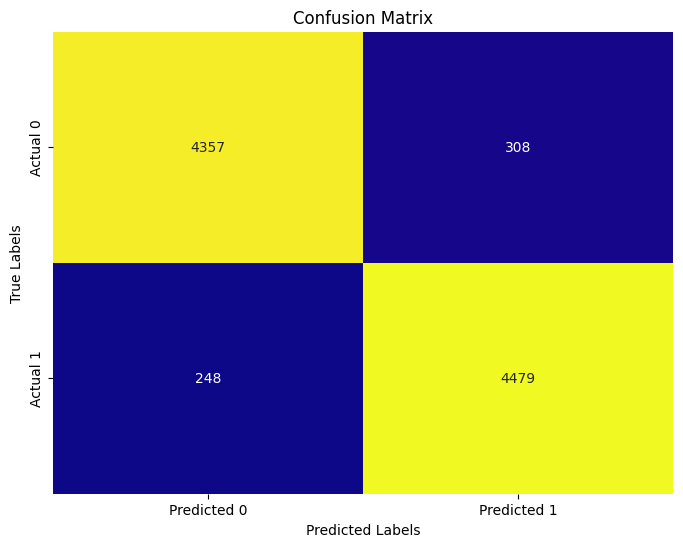

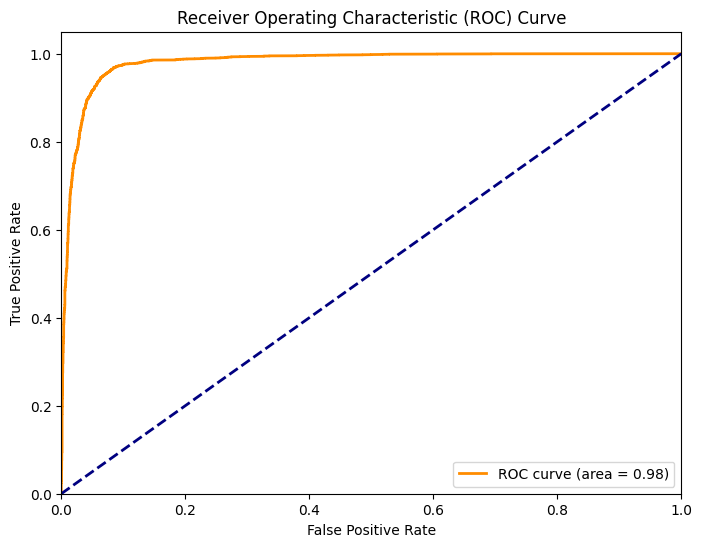

In [ ]:
# Producing output estimates for the provided input examples using most effective tree-based model.
ypredranclstest = rf_classifier.predict(X_test)
accranclstest=accuracy_score(y_test,ypredranclstest)
precranclstest=precision_score(y_test,ypredranclstest)
recallranclstest=recall_score(y_test,ypredranclstest)
f1ranclstest=f1_score(y_test,ypredranclstest)
cmranclstest=confusion_matrix(y_test,ypredranclstest)

# Displaying how often the predictions weres correct in total.
print("Accuracy:",accranclstest)
# Showing the proportion of flagged positves that were actually tru.
print("Precision:",precranclstest)
# Indicating the portion of true positives successfully identified.
print("Recall:",recallranclstest)
# Presenting the combined measure of precision and recall, weighted evenly.
print("F1 Score:",f1ranclstest)

# setup fegure sizs of graphh
plt.figure(figsize=(8, 6))
#create conffusion matric using heattmp
sns.heatmap(cmranclstest, annot=True, fmt="d", cmap="plasma", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            # The vertical axis is labelled to reflect the actuals class values.
            yticklabels=['Actual 0', 'Actual 1'])
#setup tittle fof graphh
plt.title('Confusion Matrix')
#adding labeling on xaxi
plt.xlabel('Predicted Labels')
#adding labelling on yaxs
plt.ylabel('True Labels')
# Display the final visual output.
plt.show()
#Extract the anticipated probbilities for the positve clas .
yprobaranclstest = rf_classifier.predict_proba(X_test)[:, 1]

# Producing values required to plot curv asesing  false alarm rate versus sensittivity trade-off.
fpr, tpr, thresholds = roc_curve(y_test, yprobaranclstest)
# Finding the overall area under that curv, which provides a summaryy.
roc_auc = auc(fpr, tpr)
# Making a fresh blank document forr next chrt.
plt.figure(figsize=(8, 6))
# Using an orange lines thickness for visibility and a score labelle, draw the primary performance curv.
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#plot the reference line(digonal lines)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Establish xandy axi limitations.
plt.xlim([0.0, 1.0])
# To concentrate the view,vertcal nd horzontal axs.
plt.ylim([0.0, 1.05])
# Giving the horizontal dimensions.
plt.xlabel('False Positive Rate')
# Giving the vertical dimension a name accurately..
plt.ylabel('True Positive Rate')
# Setting a descriptive heading that tells which modl and dataset this visul rpresents.
plt.title('Receiver Operating Characteristic (ROC) Curve')
# Placing the explanation labelle in bottom-rights section of chrt.
plt.legend(loc="lower right")
# Display the final visual output.
plt.show()

In [27]:
from sklearn.pipeline import Pipeline
import joblib

# Build pipeline: vectorizer + model
pipeline = Pipeline([
    ("tfidf", tfidf_vectorizer),
    ("model", rf_classifier)
])

# Save the pipeline
joblib.dump(pipeline, "fake_news_pipeline.pkl")

print("✅ Pipeline saved successfully!")


✅ Pipeline saved successfully!
